In [47]:
import os
import numpy as np
import scanpy as sc
import anndata as ad
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(5, 5)
plt.rcParams['figure.dpi'] = 100
sc.settings.verbosity = 3
sc.settings.figdir = '../figures/'
sc.logging.print_versions()
#results_file = './write/results.h5ad'
import warnings
warnings.filterwarnings('ignore')


%load_ext autoreload
%autoreload 2 

scanpy==1.4.4.post1 anndata==0.7.4 umap==0.3.10 numpy==1.19.2 scipy==1.5.2 pandas==1.1.2 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.8.2 louvain==0.6.1
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
pvn = sc.read('../data/processed/PVN_renamed_latest.h5ad')
adrenal = sc.read('../data/processed/adrenal_renamed_latest.h5ad')
pituitary = sc.read('../data/processed/pituitary_renamed_latest.h5ad')

/app/python37/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/app/python37/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


# S1

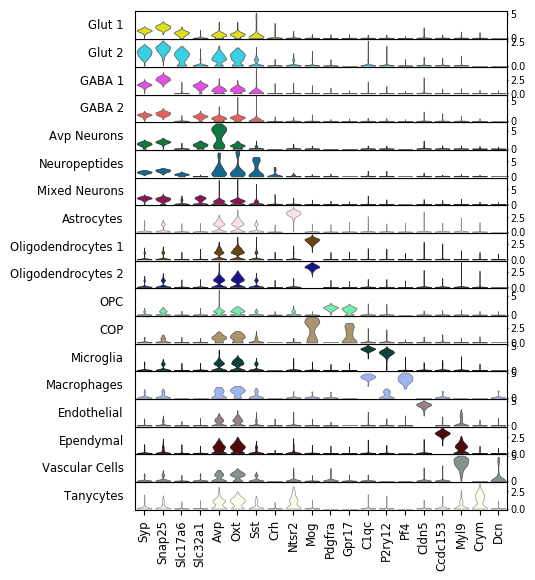

In [49]:
sc.pl.stacked_violin(
    pvn,
    var_names=['Syp',
               'Snap25',
               'Slc17a6',
               'Slc32a1',
               'Avp',
               'Oxt',
               'Sst',
               'Crh',
               'Ntsr2',
               'Mog',
               'Pdgfra',
               'Gpr17',
               'C1qc',
               'P2ry12',
               'Pf4',
               'Cldn5',
               'Ccdc153',
               'Myl9',
               'Crym',
               'Dcn'],
    groupby='louvain_r1',
    dendrogram=False,
    use_raw=True,
    swap_axes=False,
    row_palette=pvn.uns['louvain_r1_colors']
)

# S2

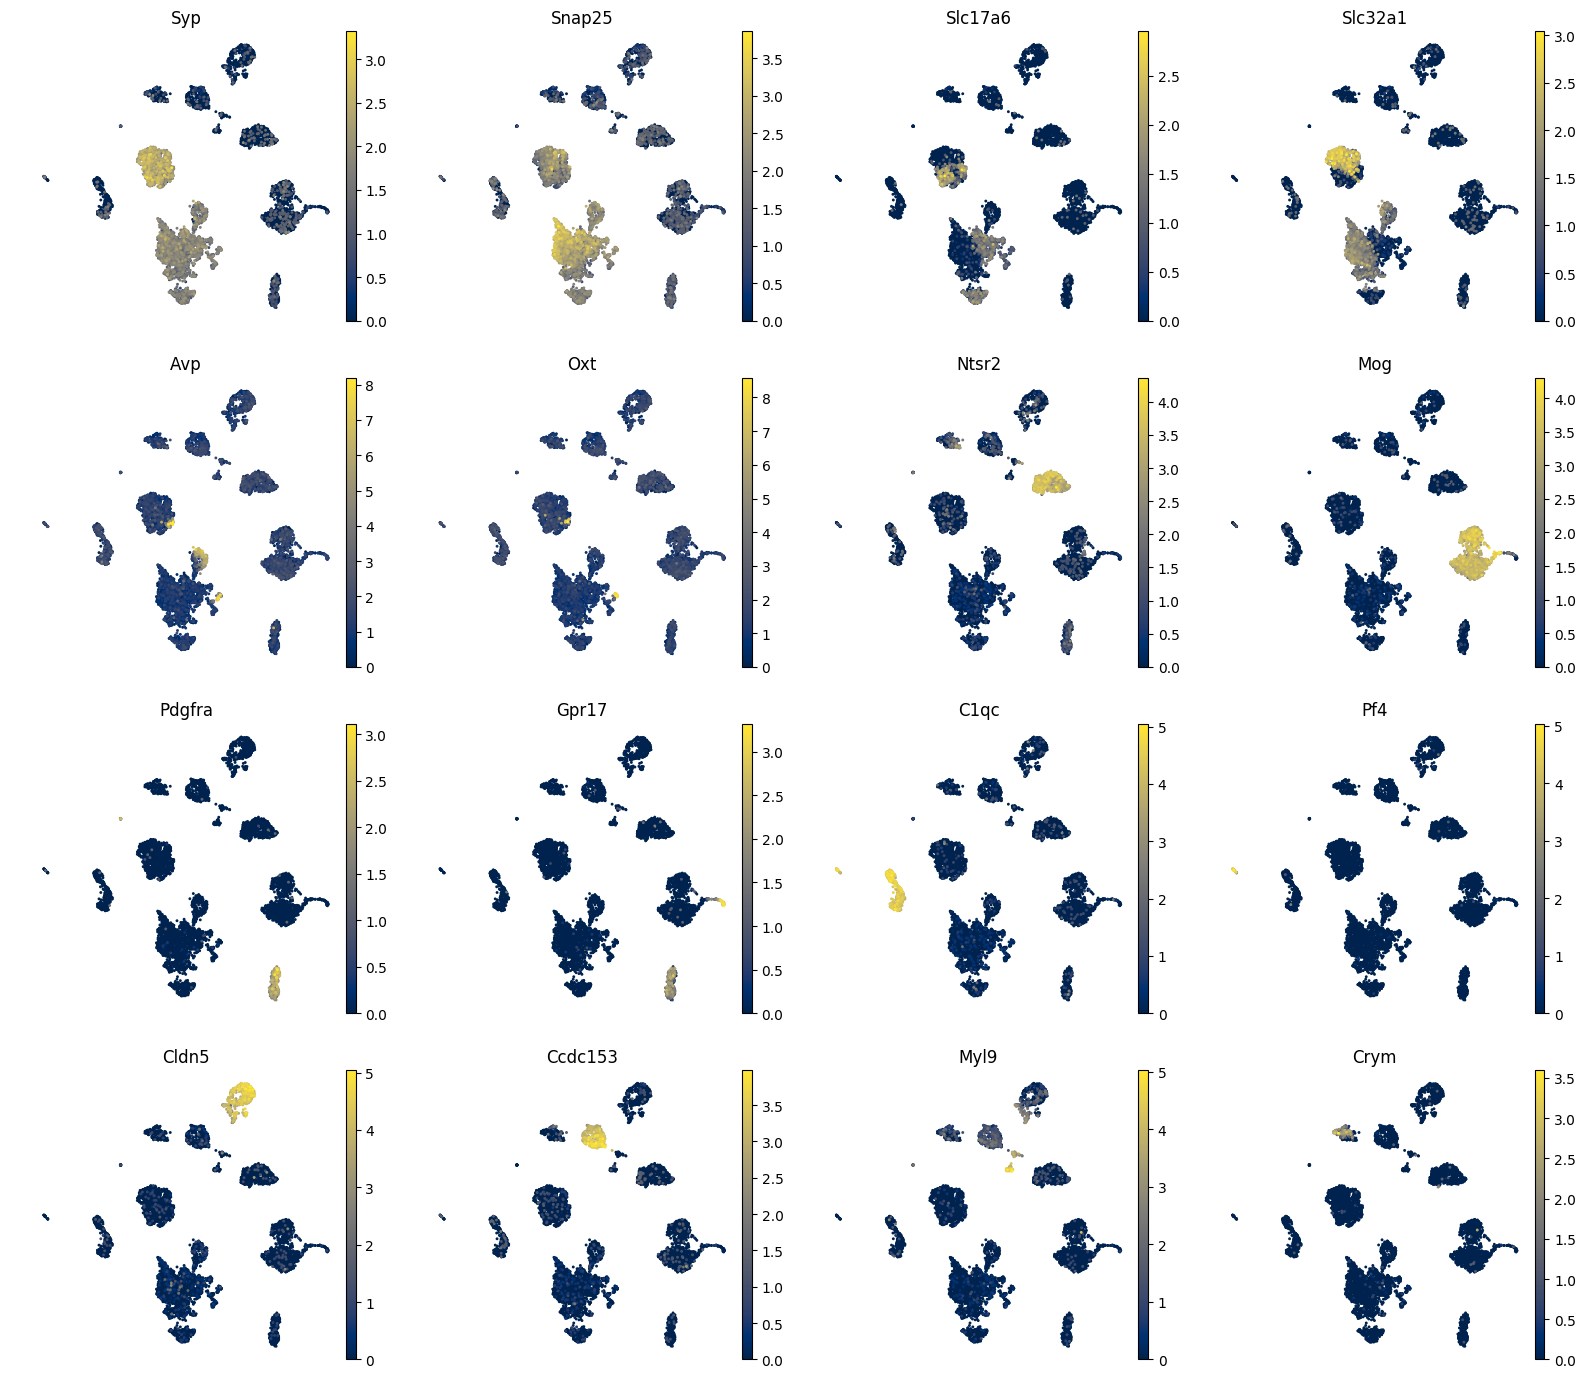

In [44]:
genes = [
    'Syp',
    'Snap25', 
    'Slc17a6',
    'Slc32a1',
    'Avp',
    'Oxt',
    'Ntsr2',
    'Mog',
    'Pdgfra',
    'Gpr17',
    'C1qc',
    'Pf4',
    'Cldn5',
    'Ccdc153',
    'Myl9',
    'Crym'
]

fig, ax = plt.subplots(4, 4, figsize=(16, 14))
ax = ax.flatten()
for i, gene in enumerate(genes):
    p = sc.pl.umap(pvn, color=gene, show=False, frameon=False, ax=ax[i], cmap='cividis')
fig.tight_layout()

# S3

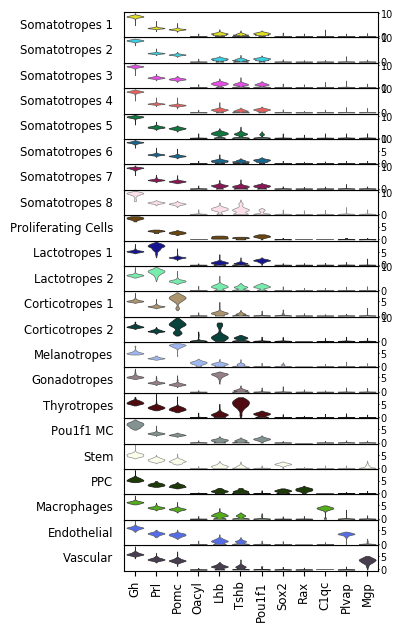

In [48]:
sc.pl.stacked_violin(
    pituitary,
    var_names=['Gh', 'Prl', 'Pomc', 'Oacyl', 'Lhb', 'Tshb', 'Pou1f1', 'Sox2', 'Rax', 'C1qc', 'Plvap', 'Mgp'],
    groupby='louvain_r1',
    dendrogram=False,
    use_raw=True,
    swap_axes=False,
    row_palette=pituitary.uns['louvain_r1_colors'])

# S4

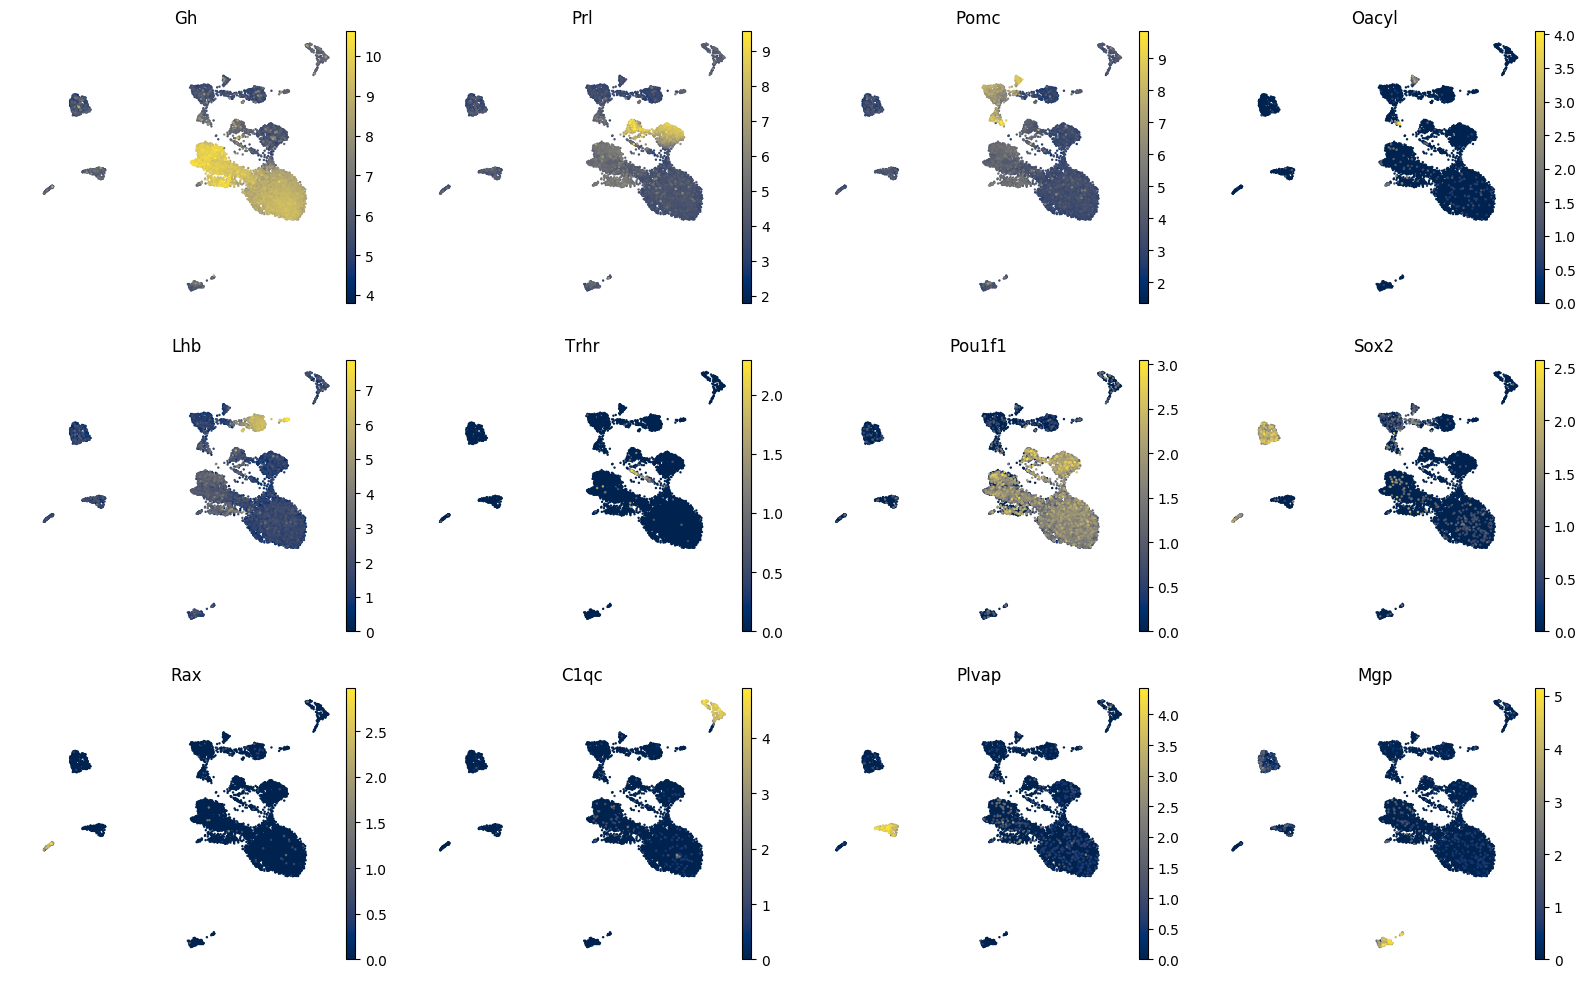

In [41]:
genes = [
    'Gh',
    'Prl', 
    'Pomc',
    'Oacyl',
    'Lhb',
    'Trhr',
    'Pou1f1',
    'Sox2',
    'Rax',
    'C1qc',
    'Plvap',
    'Mgp'
]

fig, ax = plt.subplots(3, 4, figsize=(16, 10))
ax = ax.flatten()
for i, gene in enumerate(genes):
    p = sc.pl.umap(pituitary, color=gene, show=False, frameon=False, ax=ax[i], cmap='cividis')
fig.tight_layout()

# S5

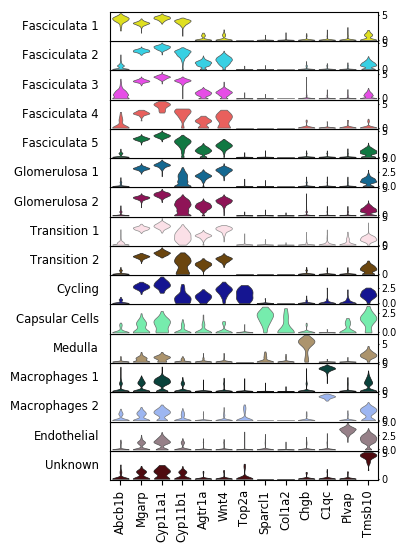

In [51]:
sc.pl.stacked_violin(
    adrenal,
    var_names=['Abcb1b',
               'Mgarp',
               'Cyp11a1',
               'Cyp11b1',
               'Agtr1a', 
               'Wnt4',
               'Top2a',
               'Sparcl1',
               'Col1a2', 
               'Chgb',
               'C1qc',
               'Plvap', 
               'Tmsb10'],
    groupby='louvain_r1',
    dendrogram=False,
    use_raw=True,
    swap_axes=False,
    row_palette=adrenal.uns['louvain_r1_colors']
)

# S6

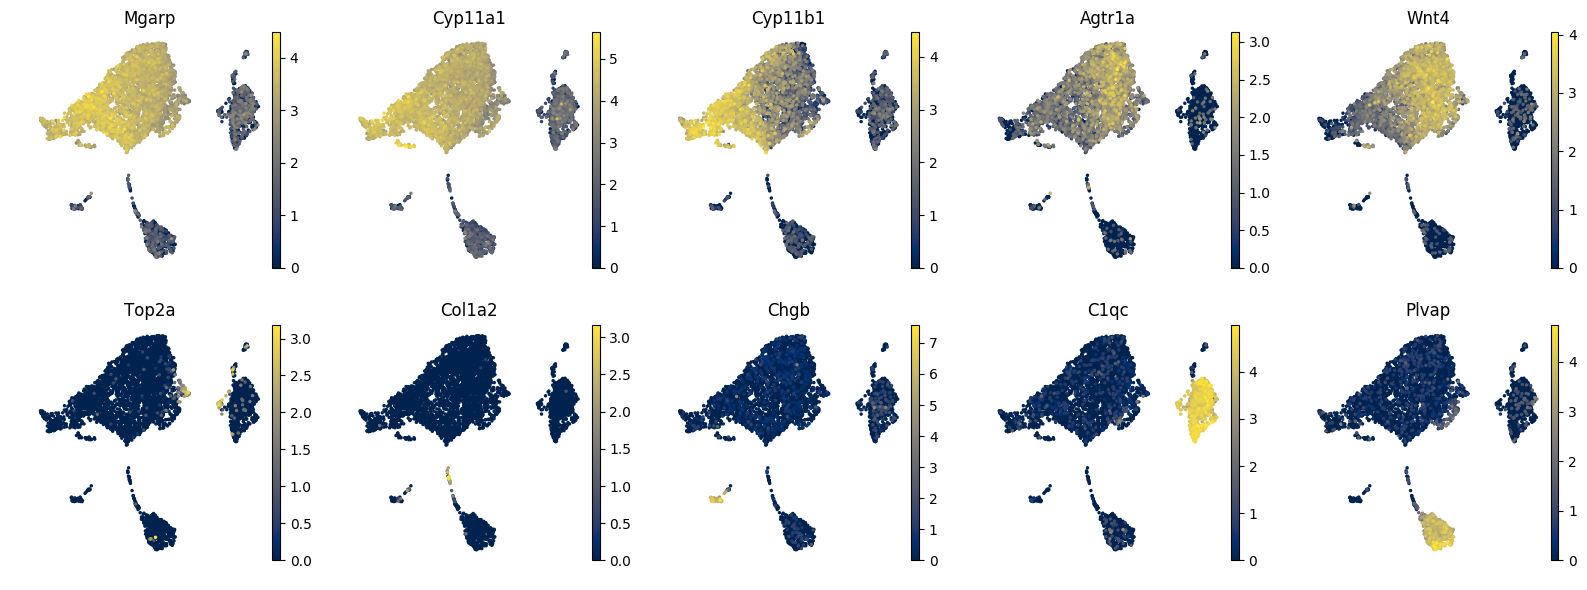

In [38]:
genes = [
    'Mgarp',
    'Cyp11a1', 
    'Cyp11b1',
    'Agtr1a',
    'Wnt4',
    'Top2a',
    'Col1a2',
    'Chgb',
    'C1qc',
    'Plvap'
]

fig, ax = plt.subplots(2, 5, figsize=(16, 6))
ax = ax.flatten()
for i, gene in enumerate(genes):
    p = sc.pl.umap(adrenal, color=gene, show=False, frameon=False, ax=ax[i], cmap='cividis')
fig.tight_layout()

# S7

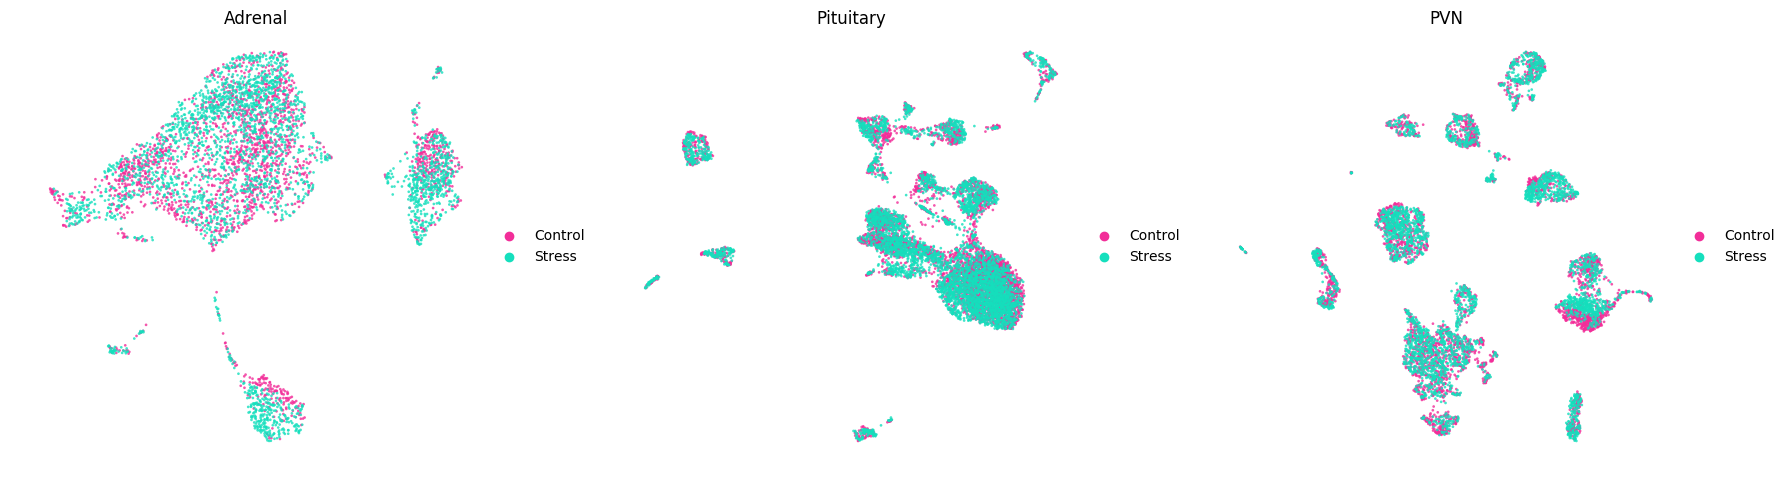

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sc.pl.umap(adrenal, color='condition', frameon=False, show=False, ax=ax[0], size=15, alpha=0.8, palette=['#F22E99', '#15DFBD'])
ax[0].set_title('Adrenal')
sc.pl.umap(pituitary, color='condition', frameon=False, show=False, ax=ax[1], size=15, alpha=0.8, palette=['#F22E99', '#15DFBD'])
ax[1].set_title('Pituitary')
sc.pl.umap(pvn, color='condition', frameon=False, show=False, ax=ax[2], size=15, alpha=0.8, palette=['#F22E99', '#15DFBD'])
ax[2].set_title('PVN')
plt.tight_layout()

# S8

In [12]:
sc.tl.rank_genes_groups(adrenal, groupby='louvain_r1', key_added='rank_genes_r1')

ranking genes


/app/python37/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished: added to `.uns['rank_genes_r1']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:09)


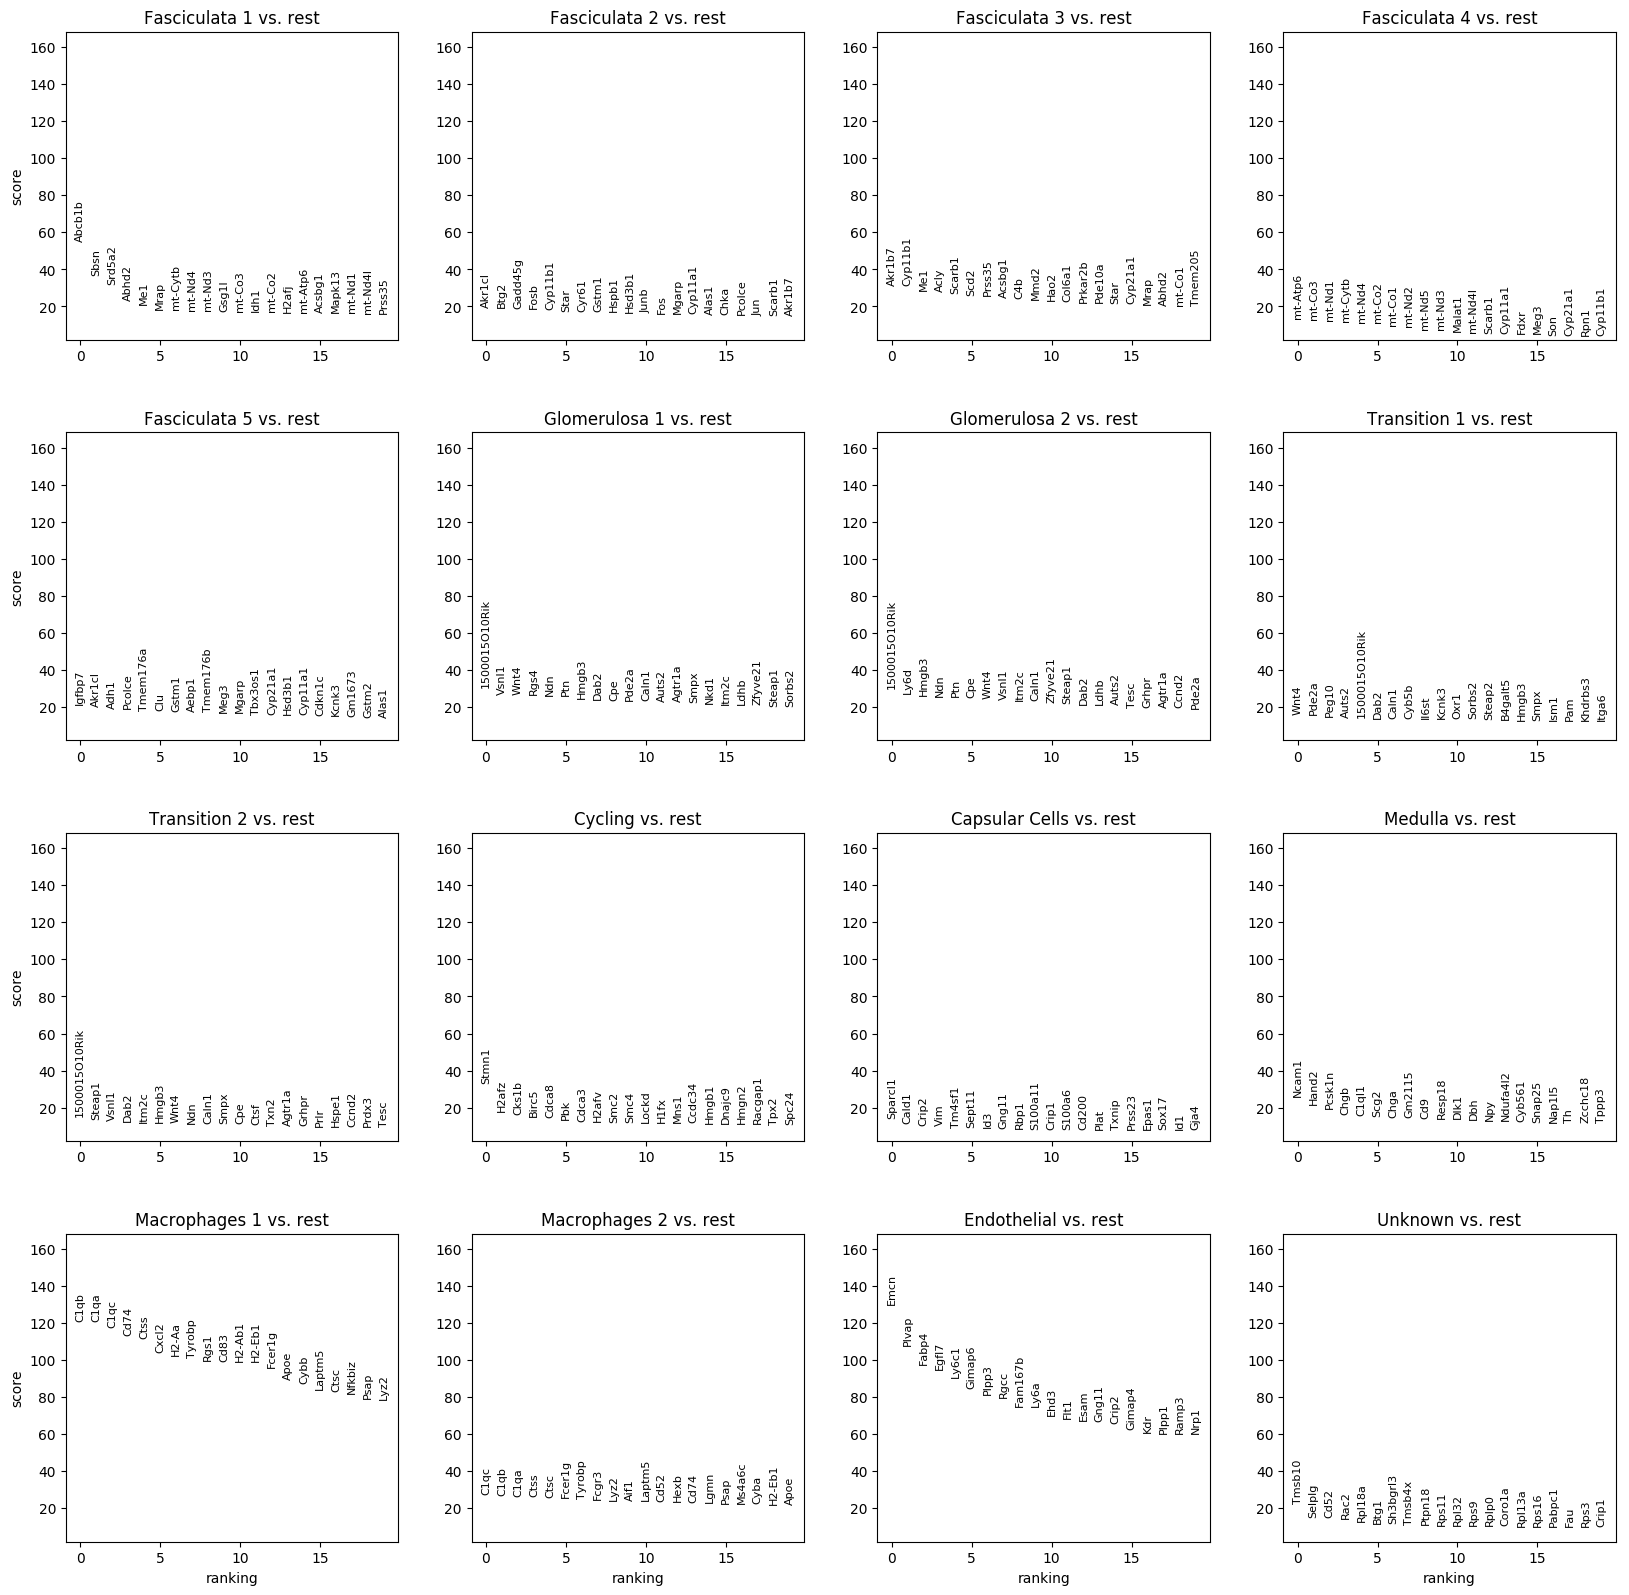

In [15]:
sc.pl.rank_genes_groups(adrenal, key='rank_genes_r1')

# S9

In [5]:
adata = pvn.concatenate([adrenal, pituitary], batch_key='tissue')

Text(0.5, 0.98, 'QC metrics')

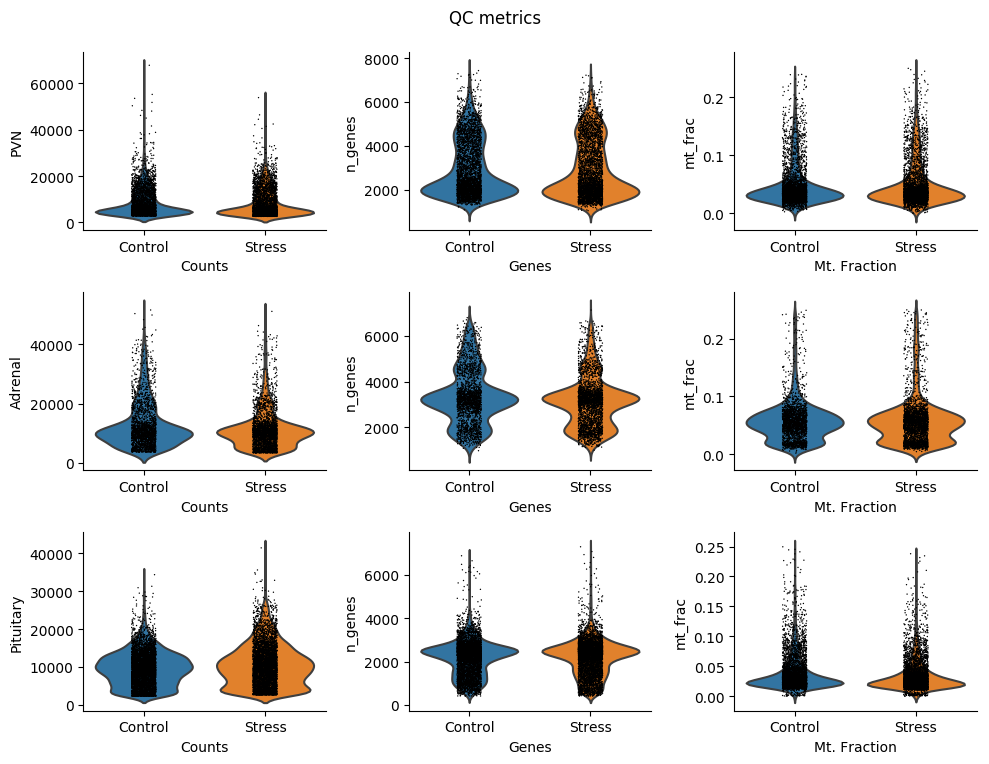

In [61]:
fig, ax = plt.subplots(3, 3, figsize=(10, 8))
sc.pl.violin(pvn, keys='n_counts', groupby='condition', show=False, ax=ax[0, 0])
ax[0, 0].set_ylabel('PVN')
ax[0, 0].set_xlabel('Counts')
sc.pl.violin(pvn, keys='n_genes', groupby='condition', show=False, ax=ax[0, 1])
ax[0, 1].set_xlabel('Genes')
sc.pl.violin(pvn, keys='mt_frac', groupby='condition', show=False, ax=ax[0, 2])
ax[0, 2].set_xlabel('Mt. Fraction')
sc.pl.violin(adrenal, keys='n_counts', groupby='condition', show=False, ax=ax[1, 0])
ax[1, 0].set_ylabel('Adrenal')
ax[1, 0].set_xlabel('Counts')
sc.pl.violin(adrenal, keys='n_genes', groupby='condition', show=False, ax=ax[1, 1])
ax[1, 1].set_xlabel('Genes')
sc.pl.violin(adrenal, keys='mt_frac', groupby='condition', show=False, ax=ax[1, 2])
ax[1, 2].set_xlabel('Mt. Fraction')
sc.pl.violin(pituitary, keys='n_counts', groupby='condition', show=False, ax=ax[2, 0])
ax[2, 0].set_ylabel('Pituitary')
ax[2, 0].set_xlabel('Counts')
sc.pl.violin(pituitary, keys='n_genes', groupby='condition', show=False, ax=ax[2, 1])
ax[2, 1].set_xlabel('Genes')
sc.pl.violin(pituitary, keys='mt_frac', groupby='condition', show=False, ax=ax[2, 2])
ax[2, 2].set_xlabel('Mt. Fraction')
sns.despine()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("QC metrics")